# 06.5 - Small ML example

<div class="alert alert-danger">
    <b> Create a specific virtual environment for this notebook! <b>
</div>
        
Make sure you are running this notebook in the virtual environment from the dask.yml file.

---

In this notebook we are going to launch a local client and execute a simple ML project.

Everytime you run a dask instance, you launch a local __Server__. A Server is a manager for your distributed operations.

You can launch a __Client__, which is a programme that connects to your Server. It is a similar way of how a web browser (client) connects to a website (server).

In this course we are only going to look at running large processes in your laptop. You might encounter situations where you have to handle very large datasets in the future and pandas will not be able to handle them. Dask is an option for handling very large datasets.

__Dask__ is a __out of core__ dataframe handler. Instead of doing everything in memory in one go, Dask has a rule set to handle the required processes using your hard drive together with your RAM memory.

The jupyter-lab extension is just a helper. It is not mandatory.

---

In [1]:
from dask.distributed import Client

# Scale up: connect to your own cluster with more resources
# see http://dask.pydata.org/en/latest/setup.html
client = Client(processes=False, threads_per_worker=4,
                n_workers=1, memory_limit='2GB')
client

C:\Users\luisg\anaconda3\envs\dask\lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 55974 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://192.168.1.105:55974/status,
Dashboard: http://192.168.1.105:55974/status,Workers: 1
Total threads: 4,Total memory: 1.86 GiB
Status: running,Using processes: False
Comm: inproc://192.168.1.105/9824/1,Workers: 1
Dashboard: http://192.168.1.105:55974/status,Total threads: 4
Started: Just now,Total memory: 1.86 GiB
Comm: inproc://192.168.1.105/9824/4,Total threads: 4
Dashboard: http://192.168.1.105:55975/status,Memory: 1.86 GiB
Nanny: None,


In [2]:
import dask_ml.datasets
import dask_ml.cluster
import dask
dask.config.set({"visualization.engine": "cytoscape"})
import matplotlib.pyplot as plt

In [3]:
# Scale up: increase n_samples or n_features
X, y = dask_ml.datasets.make_blobs(n_samples=10000000,
                  chunks=1000000, #a way of grouping the generated points
                  random_state=0,
                  centers=3)
X = X.persist()
X

dask.array<concatenate, shape=(10000000, 2), dtype=float64, chunksize=(1000000, 2), chunktype=numpy.ndarray>

In [4]:
km = dask_ml.cluster.KMeans(n_clusters=3, init_max_iter=2, oversampling_factor=10)
km.fit(X)

C:\Users\luisg\anaconda3\envs\dask\lib\site-packages\dask\base.py:1369: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(
C:\Users\luisg\anaconda3\envs\dask\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\luisg\anaconda3\envs\dask\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init_max_iter=2, n_clusters=3, oversampling_factor=10)

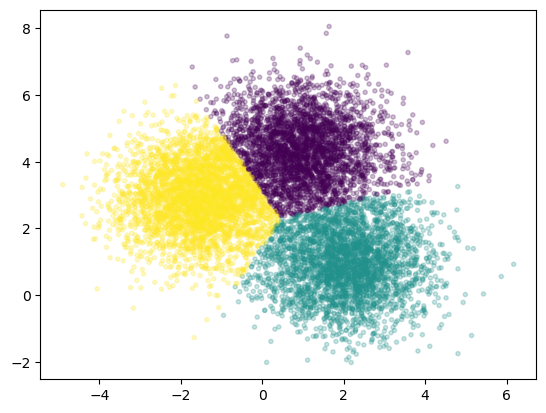

In [5]:
fig, ax = plt.subplots()
ax.scatter(X[::1000, 0], X[::1000, 1], marker='.', c=km.labels_[::1000],
           cmap='viridis', alpha=0.25);